<a href="https://colab.research.google.com/github/sam4food/ics635-hw04/blob/main/ics635_hw04.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Importing

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn.model_selection import train_test_split

## Data

In [ ]:
data = tf.keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = data.load_data()

train_images = train_images / 255.0
test_images = test_images / 255.0

train_images = train_images.reshape((train_images.shape[0], 28, 28, 1))
test_images = test_images.reshape((test_images.shape[0], 28, 28, 1))

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

train_images, val_images, train_labels, val_labels = train_test_split(
    train_images, train_labels, test_size=0.2, random_state=42)

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


## Baseline Model

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.7435 - loss: 0.7045 - val_accuracy: 0.8658 - val_loss: 0.3662
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8727 - loss: 0.3472 - val_accuracy: 0.8784 - val_loss: 0.3351
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8919 - loss: 0.2957 - val_accuracy: 0.8882 - val_loss: 0.3037
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9046 - loss: 0.2623 - val_accuracy: 0.8995 - val_loss: 0.2796
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9139 - loss: 0.2305 - val_accuracy: 0.9040 - val_loss: 0.2612
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9215 - loss: 0.2069 - val_accuracy: 0.9018 - val_loss: 0.2689
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9308 - loss: 0.1873 - val_accuracy: 0.9044 - val_loss: 0.2759
Epoch 8/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9355 - loss: 0.1733 - 

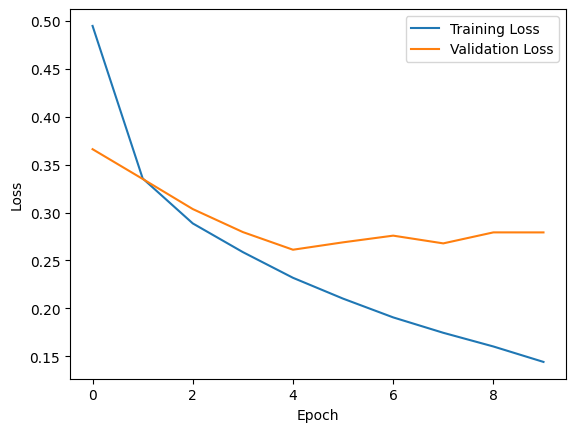

Baseline Test Accuracy: 0.9025999903678894


In [ ]:
def baseline_model():
    model = models.Sequential()
    model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Conv2D(64, (3, 3), activation='relu'))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Flatten())
    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.Dense(10, activation='softmax'))
    return model

baseline = baseline_model()

baseline.compile(optimizer='adam',
                       loss='categorical_crossentropy',
                       metrics=['accuracy'])

history = baseline.fit(train_images, train_labels, epochs=10,
                            validation_data=(val_images, val_labels))


plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

test_loss, test_acc = baseline.evaluate(test_images, test_labels, verbose=0)
print(f"Baseline Test Accuracy: {test_acc}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


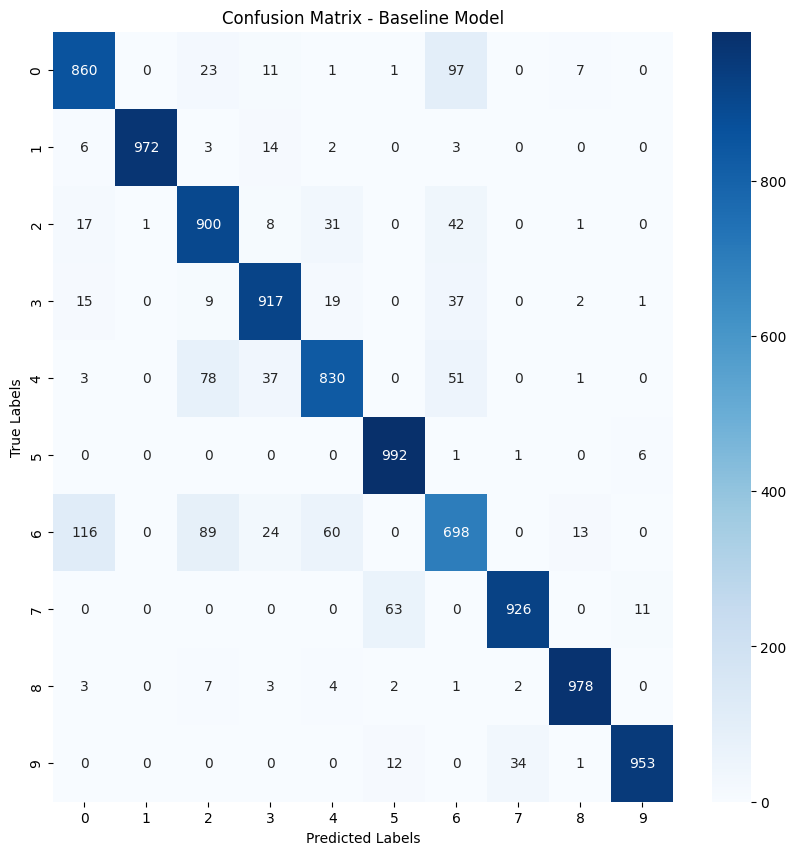

In [ ]:
predictions = baseline.predict(test_images)
predicted_labels = np.argmax(predictions, axis=1)
true_labels = np.argmax(test_labels, axis=1)
conf_matrix = confusion_matrix(true_labels, predicted_labels)

plt.figure(figsize=(10, 10))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix - Baseline Model')
plt.show()

## Model with Droupout and Batch Normalization

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.7576 - loss: 0.7176 - val_accuracy: 0.8753 - val_loss: 0.3441
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8662 - loss: 0.3740 - val_accuracy: 0.8800 - val_loss: 0.3235
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8781 - loss: 0.3395 - val_accuracy: 0.8995 - val_loss: 0.2686
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8895 - loss: 0.3032 - val_accuracy: 0.8967 - val_loss: 0.2754
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8963 - loss: 0.2817 - val_accuracy: 0.9057 - val_loss: 0.2539
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9001 - loss: 0.2716 - val_accuracy: 0.8922 - val_loss: 0.2828
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9077 - loss: 0.2512 - val_accuracy: 0.9111 - val_loss: 0.2346
Epoch 8/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9117 - loss: 0.2407 -

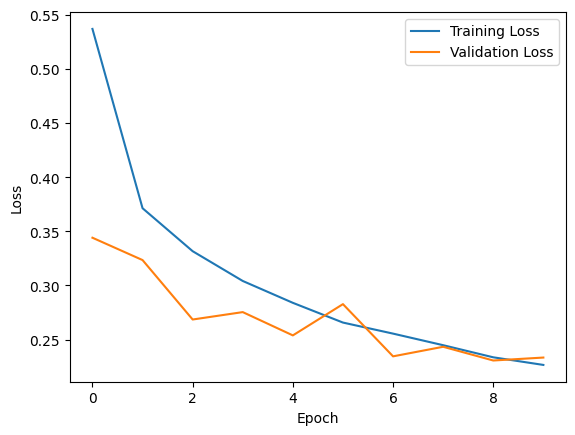

Model with Dropout and BN Test Accuracy: 0.9077000021934509


In [ ]:
def model_with_dropout_bn():
    model = models.Sequential()
    model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
    model.add(layers.BatchNormalization())
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Conv2D(64, (3, 3), activation='relu'))
    model.add(layers.BatchNormalization()) # Batch Normalization here
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Dropout(0.25))  # Dropout here
    model.add(layers.Flatten())
    model.add(layers.Dense(128, activation='relu'))
    model.add(layers.BatchNormalization()) # Batch Normalization here
    model.add(layers.Dropout(0.5))  # Dropout here
    model.add(layers.Dense(10, activation='softmax'))
    return model

dropout_bn = model_with_dropout_bn()

dropout_bn.compile(optimizer='adam',
                              loss='categorical_crossentropy',
                              metrics=['accuracy'])

history_dropout_bn = dropout_bn.fit(train_images, train_labels, epochs=10,
                                              validation_data=(val_images, val_labels))

plt.plot(history_dropout_bn.history['loss'], label='Training Loss')
plt.plot(history_dropout_bn.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

test_loss_dropout_bn, test_acc_dropout_bn = dropout_bn.evaluate(test_images, test_labels, verbose=0)
print(f"Model with Dropout and BN Test Accuracy: {test_acc_dropout_bn}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


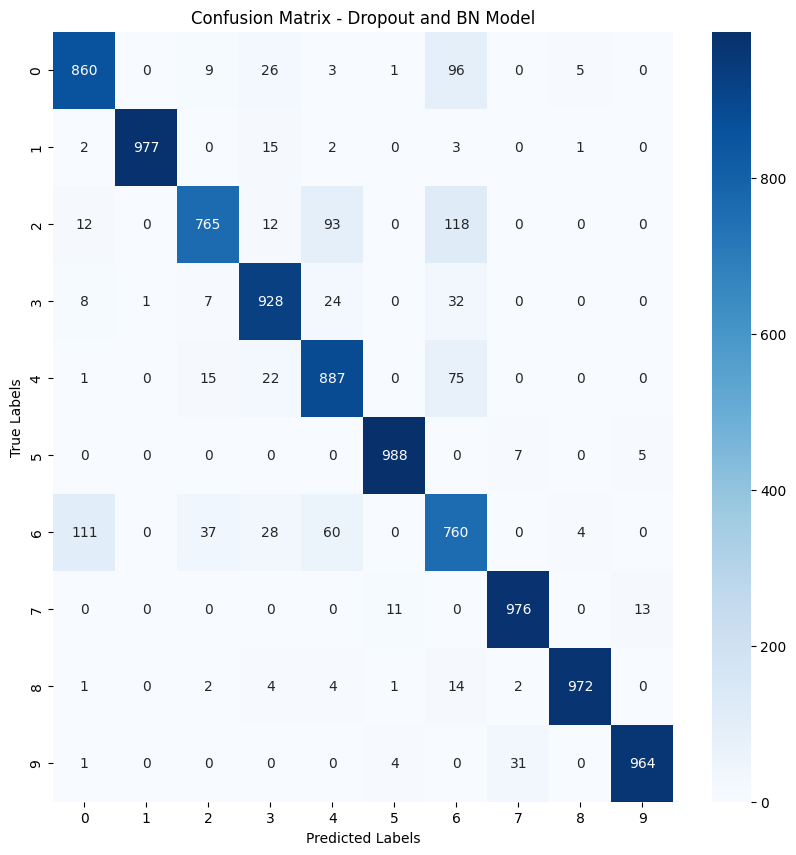

In [ ]:
predictions_dropout_bn = dropout_bn.predict(test_images)
predicted_labels_dropout_bn = np.argmax(predictions_dropout_bn, axis=1)
conf_matrix_dropout_bn = confusion_matrix(true_labels, predicted_labels_dropout_bn)

plt.figure(figsize=(10, 10))
sns.heatmap(conf_matrix_dropout_bn, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix - Dropout and BN Model')
plt.show()

## Data Augmentation

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
    rotation_range=10,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True,
    zoom_range=0.1,
)
datagen.fit(train_images)

Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


1500/1500 ━━━━━━━━━━━━━━━━━━━━ 18s 11ms/step - accuracy: 0.6507 - loss: 0.9432 - val_accuracy: 0.8144 - val_loss: 0.5091
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 15s 10ms/step - accuracy: 0.7888 - loss: 0.5608 - val_accuracy: 0.8488 - val_loss: 0.4109
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 15s 10ms/step - accuracy: 0.8194 - loss: 0.4825 - val_accuracy: 0.8552 - val_loss: 0.3899
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 16s 10ms/step - accuracy: 0.8343 - loss: 0.4424 - val_accuracy: 0.8602 - val_loss: 0.3723
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 15s 10ms/step - accuracy: 0.8452 - loss: 0.4143 - val_accuracy: 0.8754 - val_loss: 0.3341
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 15s 10ms/step - accuracy: 0.8552 - loss: 0.3876 - val_accuracy: 0.8662 - val_loss: 0.3538
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 15s 10ms/step - accuracy: 0.8575 - loss: 0.3750 - val_accuracy: 0.8882 - val_loss: 0.3115
Epoch 8/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 15s 10ms/step - accuracy: 0.8619 - loss: 0.36

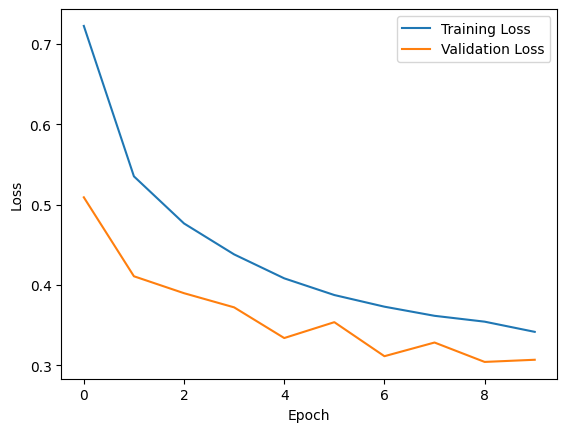

Model with Augmentation Test Accuracy: 0.8835999965667725


In [ ]:
def model_with_augmentation():
    model = models.Sequential()
    model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Conv2D(64, (3, 3), activation='relu'))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Flatten())
    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.Dense(10, activation='softmax'))
    return model

data_augmentation = model_with_augmentation()

data_augmentation.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

history_augmentation = data_augmentation.fit(datagen.flow(train_images, train_labels, batch_size=32),
                        epochs=10,
                        validation_data=(val_images, val_labels))

plt.plot(history_augmentation.history['loss'], label='Training Loss')
plt.plot(history_augmentation.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

test_loss_augmentation, test_acc_augmentation = data_augmentation.evaluate(test_images, test_labels, verbose=0)
print(f"Model with Augmentation Test Accuracy: {test_acc_augmentation}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


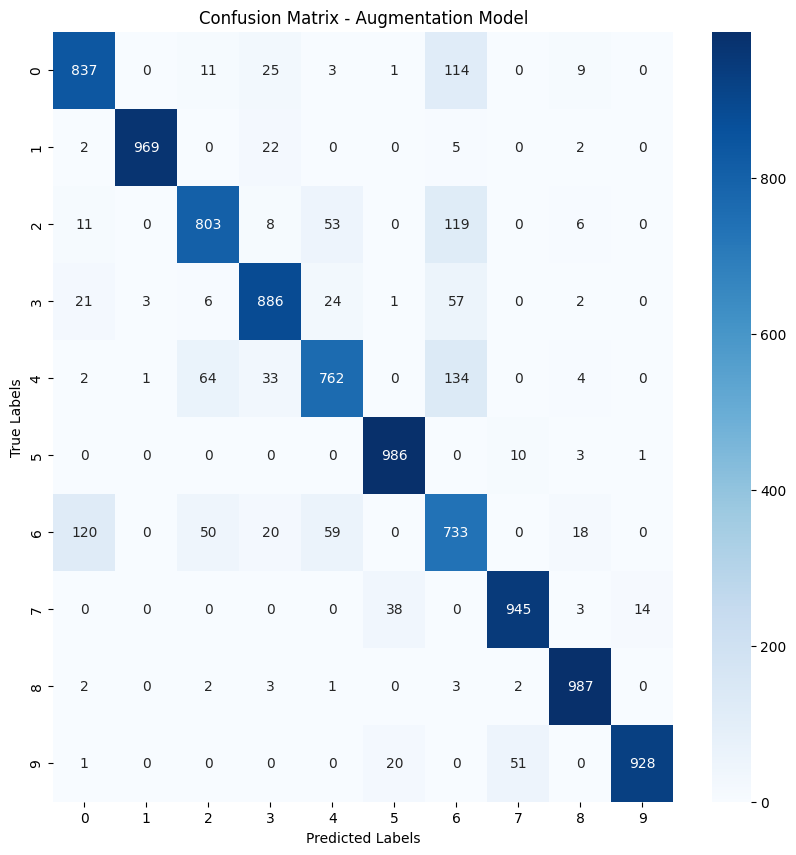


Comparison of Results:
Baseline Test Accuracy: 0.9025999903678894
Model with Dropout and BN Test Accuracy: 0.9077000021934509
Model with Augmentation Test Accuracy: 0.8835999965667725


In [ ]:
predictions_augmentation = data_augmentation.predict(test_images)
predicted_labels_augmentation = np.argmax(predictions_augmentation, axis=1)
conf_matrix_augmentation = confusion_matrix(true_labels, predicted_labels_augmentation)

plt.figure(figsize=(10, 10))
sns.heatmap(conf_matrix_augmentation, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix - Augmentation Model')
plt.show()

print("\nComparison of Results:")
print(f"Baseline Test Accuracy: {test_acc}")
print(f"Model with Dropout and BN Test Accuracy: {test_acc_dropout_bn}")
print(f"Model with Augmentation Test Accuracy: {test_acc_augmentation}")